# **Project: Anomaly Detection for AITEX Dataset**
#### Track: VAE
## `Notebook 3`: Input Features: What Kind of Data Works?
**Author**: Oliver Grau 

**Date**: 27.03.2025  
**Version**: 1.0

## 📚 Table of Contents

- [1. Tabular Data](#1-tabular-data)
- [2. Time-Series Data](#2-time-series-data)
- [3. Image-Data](#3-image-data)
- [4. Why Stable Normal Data is Key](#4-why-stable-normal-data-is-key)
- [5. Conclusion & Outlook](#5-conclusion-outlook)

---

Autoencoders are versatile tools that can handle a wide variety of input data formats, but the nature of the input data has a major influence on how your model is structured, trained, and evaluated.

## 1. Tabular Data
- Common in business scenarios: e.g., order history, machine logs, KPI dashboards
- Each row typically represents a single data point (or snapshot in time)
- Columns are individual features (numeric or encoded categorical)
- **Preprocessing needed:**
  - Normalize numerical features (e.g., MinMaxScaler or StandardScaler)
  - One-hot encode categorical data

Example use cases:
- Anomaly detection in transaction logs
- Detecting outliers in time-tracked business metrics



##### Example Visualization – Cloud Service Telemetry
Below is a simple 2D visualization of telemetry data for a cloud service:

- X-axis: `CPU Usage (%)`
- Y-axis: `Memory Usage (GB)`
- Blue dots represent normal operating values
- Red Xs highlight anomalies like CPU spikes or memory drops

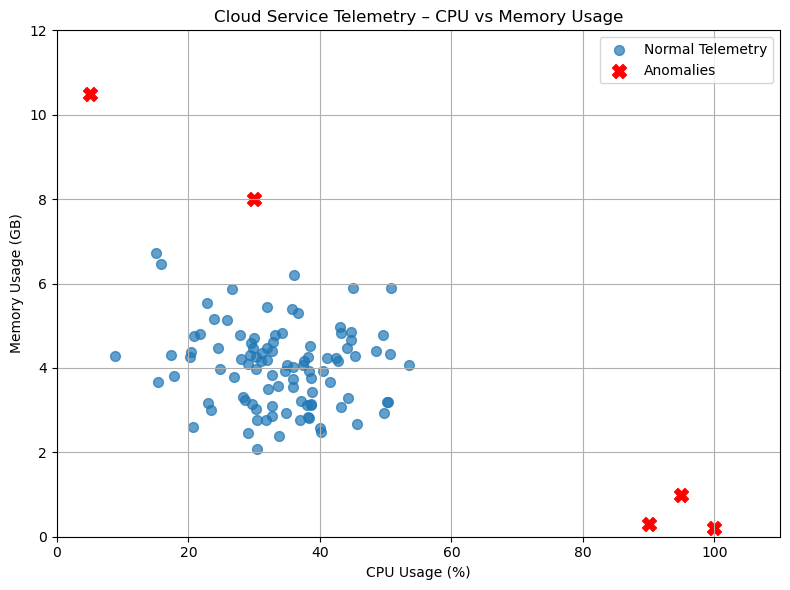

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate normal cloud telemetry data
np.random.seed(42)
cpu_normal = np.random.normal(loc=35, scale=10, size=100)  # CPU usage (%)
mem_normal = np.random.normal(loc=4, scale=1, size=100)    # Memory usage (GB)
normal_telemetry = np.column_stack((cpu_normal, mem_normal))

# Simulate anomalies (e.g. CPU spikes, memory issues)
cpu_anomalies = np.array([95, 5, 90, 30, 100])              # CPU anomalies
mem_anomalies = np.array([1.0, 10.5, 0.3, 8.0, 0.2])         # Memory anomalies
anomaly_telemetry = np.column_stack((cpu_anomalies, mem_anomalies))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(normal_telemetry[:, 0], normal_telemetry[:, 1], label='Normal Telemetry', alpha=0.7, s=50)
plt.scatter(anomaly_telemetry[:, 0], anomaly_telemetry[:, 1], color='red', label='Anomalies', marker='X', s=100)
plt.title('Cloud Service Telemetry – CPU vs Memory Usage')
plt.xlabel('CPU Usage (%)')
plt.ylabel('Memory Usage (GB)')
plt.xlim(0, 110)
plt.ylim(0, 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---

## 2. Time-Series Data
- Continuous measurements over time (often from sensors or log streams)
- Requires sequential modeling or windowing to fit into fixed-size input
- Autoencoders can still be used by creating fixed-size windows
- **Preprocessing needed:**
  - Normalize over each time-series channel
  - Create fixed-length sequences (sliding windows)

Example use cases:
- Predictive maintenance
- Monitoring server performance metrics

### Example Visualization – Web Service Response Time
This plot shows response time (in milliseconds) of a web service over time:
- The blue line represents normal operation
- The red Xs indicate **anomalous spikes** that might result from load issues or failures

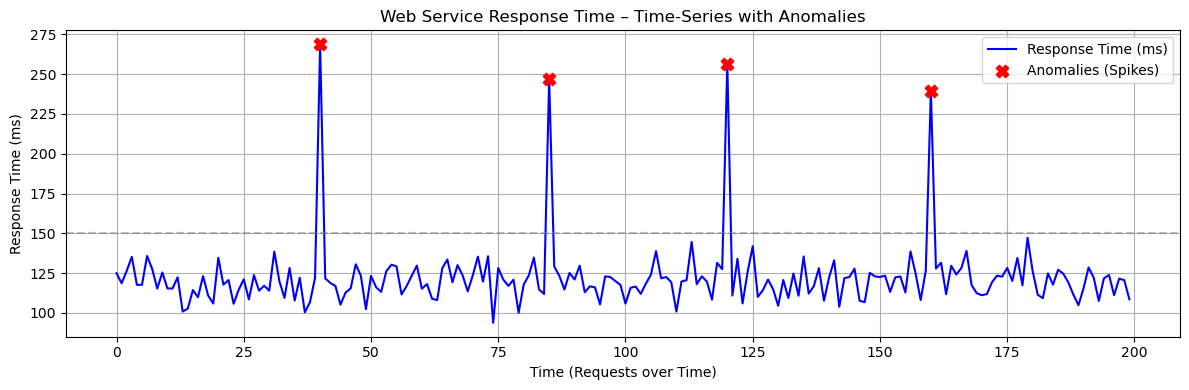

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate time-series data: Web service response time (in milliseconds)
np.random.seed(42)
timesteps = np.arange(0, 200)
normal_response = np.random.normal(loc=120, scale=10, size=200)

# Inject anomalies: sudden spikes in response time
anomaly_indices = [40, 85, 120, 160]
response_with_anomalies = normal_response.copy()
response_with_anomalies[anomaly_indices] += np.random.uniform(80, 150, size=len(anomaly_indices))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(timesteps, response_with_anomalies, label='Response Time (ms)', color='blue')
plt.scatter(timesteps[anomaly_indices], response_with_anomalies[anomaly_indices],
            color='red', label='Anomalies (Spikes)', zorder=5, s=80, marker='X')
plt.axhline(y=150, color='gray', linestyle='--', alpha=0.5)
plt.title('Web Service Response Time – Time-Series with Anomalies')
plt.xlabel('Time (Requests over Time)')
plt.ylabel('Response Time (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## 3. Image Data
- Structured as pixel matrices (grayscale or RGB)
- Requires convolutional layers (CNNs) to process efficiently
- Autoencoder compresses and reconstructs images
- Pixel-wise reconstruction error can indicate visual anomalies

Example use cases:
- Defect detection in manufacturing (scratches, dents)
- Visual quality assurance for products or components

### Example – AITEX Fabric Defect Dataset
To demonstrate image-based anomaly detection, we use the **AITEX Fabrics Defect Database**, which contains high-resolution fabric images with and without visible defects. This is an excellent dataset for learning anomaly detection concepts in a visual context.

We work with two example images:

- 🧵 **Normal Image** (no defect):
  ![Normal Fabric](../../data/NODefect_images/2311517-195063u/0005_000_04.png)

- ⚠️ **Defective Image** (visible anomaly in texture):
  ![Defective Fabric](../../data/Defect_images/0005_002_01.png)

These two examples clearly highlight the difference in surface texture. During training, an autoencoder learns to reconstruct clean, defect-free images. When a defective image is passed through the trained model, the reconstruction error increases—especially in the area of the anomaly.

This reconstruction error can then be used to detect and localize defects automatically, making it ideal for quality control in manufacturing.

> 📌 *Note: Please pay attention to the licencing terms of the AITEX Dataset*

---

## 4. Why Stable "Normal" Data is Key
Autoencoders work best when trained on clean, normal (non-anomalous) data. Their job is to learn the typical patterns in the data. When something outside of that pattern (an anomaly) is encountered during inference, the reconstruction error rises—signaling a deviation.

That’s why **feature stability and consistency** are crucial:
- Use consistent feature scaling between train/test
- Avoid mixing different categories (e.g., machines, product types) unless the model is specifically trained for all

### 🔄 Summary
| Data Type   | Recommended Network | Notes |
|-------------|---------------------|-------|
| Tabular     | Dense Autoencoder   | Normalize input; simple setup |
| Time-Series | Dense or CNN        | Use windowing; temporal context helps |
| Images      | CNN Autoencoder     | Powerful, but needs GPU or downsampling |

---

## 5. 🔚 Conclusion & Outlook

In this notebook, we explored how different types of input features (such as **tabular**, **time-series**, and **multivariate telemetry data**) can be prepared and modeled using autoencoders. We highlighted how each data type requires a tailored approach in terms of **preprocessing**, **architecture**, and **training strategies**.

This understanding is essential when transitioning from synthetic or demo data to real-world use cases, where the structure and quality of the data often determine the success of your autoencoder.

---

### Coming Up Next: The AITEX Fabric Defect Dataset

In the next notebook, we will introduce a real-world dataset: the **AITEX Fabric Defect Dataset**, which contains high-resolution grayscale images of woven textiles. This dataset presents a different type of input entirely (**image data**) with a focus on **detecting small visual anomalies** in highly regular textures.

We'll walk through:
- The dataset’s structure and defect types,
- How to prepare and load fabric images for modeling,
- Challenges and opportunities unique to visual anomaly detection.

<p style="font-size: 0.8em; text-align: center;">© 2025 Oliver Grau. Educational content for personal use only. See LICENSE.txt for full terms and conditions.</p>